In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("Titanic.csv")

In [5]:
df = df.drop(['Cabin', 'Name', 'Ticket'], axis=1) 
df = df[~df['Age'].isnull()]
df = df[~df['Embarked'].isnull()]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 1, 'Q':2, 'S':3})
df = df.drop(['PassengerId'], axis=1) 

In [9]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
834,0,3,0,18.0,0,0,8.3000,3
391,1,3,0,21.0,0,0,7.7958,3
117,0,2,0,29.0,1,0,21.0000,3
767,0,3,1,30.5,0,0,7.7500,2
660,1,1,0,50.0,2,0,133.6500,3


In [11]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.svm import SVC

svc_model = SVC(probability=True, random_state=42)
svc_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

y_pred_svm = svc_model.predict(X_test)
y_proba_svm = svc_model.predict_proba(X_test)[:, 1]

print("Метрики для модели SVM:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm), 2))
print("Precision:", round(precision_score(y_test, y_pred_svm), 2))
print("Recall:", round(recall_score(y_test, y_pred_svm), 2))
print("F1 Score:", round(f1_score(y_test, y_pred_svm), 2))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_svm), 2))
print("PR AUC (Average Precision):", round(average_precision_score(y_test, y_proba_svm), 2))


Метрики для модели SVM:
Accuracy: 0.64
Precision: 0.65
Recall: 0.38
F1 Score: 0.48
ROC AUC: 0.71
PR AUC (Average Precision): 0.62


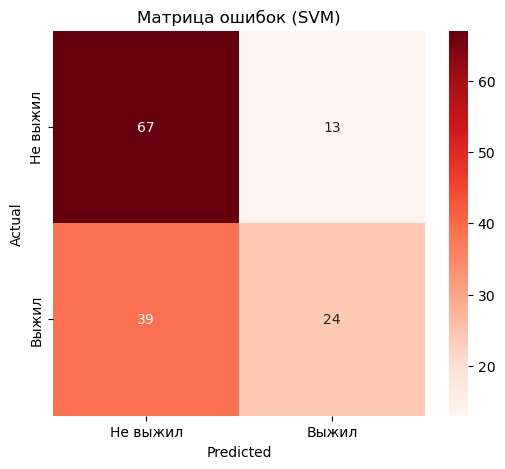

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["Не выжил", "Выжил"], yticklabels=["Не выжил", "Выжил"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Матрица ошибок (SVM)")
plt.show()

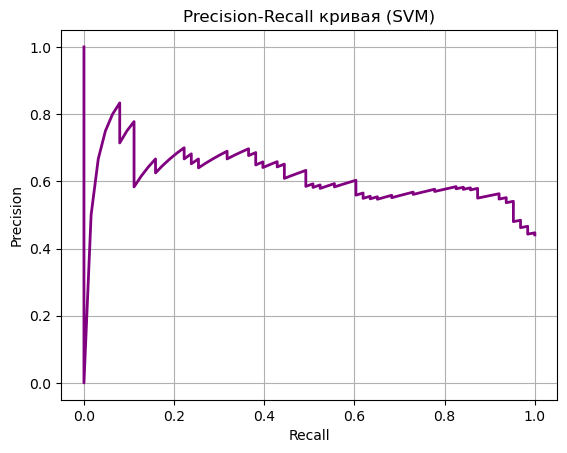

In [43]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_proba_svm)

plt.plot(recall, precision, color='purple', linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall кривая (SVM)")
plt.grid(True)
plt.show()

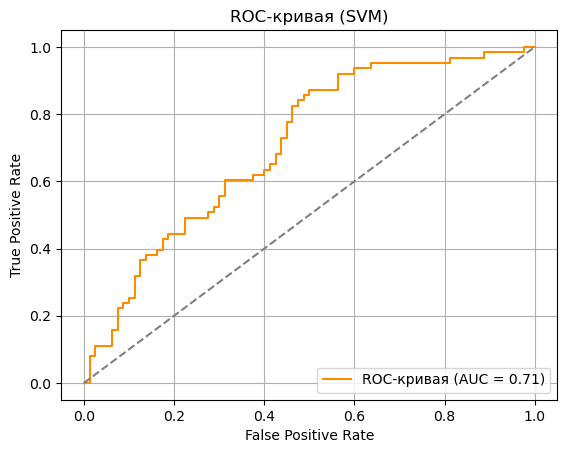

In [45]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая (SVM)")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

print("Метрики для модели KNN:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_knn), 2))
print("Precision:", round(precision_score(y_test, y_pred_knn), 2))
print("Recall:", round(recall_score(y_test, y_pred_knn), 2))
print("F1 Score:", round(f1_score(y_test, y_pred_knn), 2))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_knn), 2))
print("PR AUC (Average Precision):", round(average_precision_score(y_test, y_proba_knn), 2))

Метрики для модели KNN:
Accuracy: 0.69
Precision: 0.64
Recall: 0.7
F1 Score: 0.67
ROC AUC: 0.7
PR AUC (Average Precision): 0.6


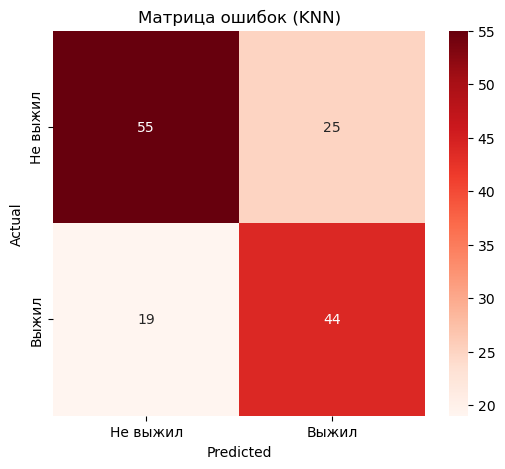

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds', xticklabels=["Не выжил", "Выжил"], yticklabels=["Не выжил", "Выжил"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Матрица ошибок (KNN)")
plt.show()

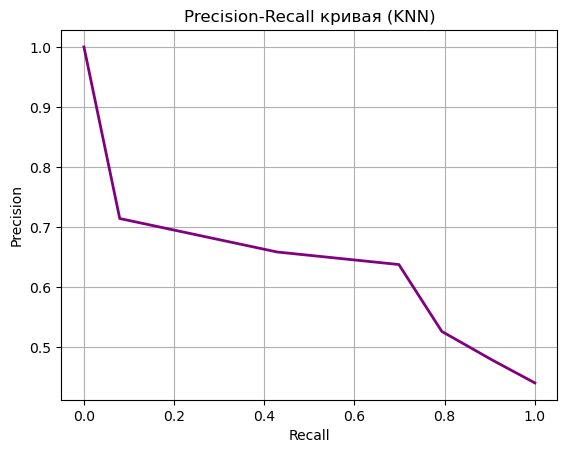

In [61]:
from sklearn.metrics import precision_recall_curve

precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_proba_knn)

plt.plot(recall_knn, precision_knn, color='purple', linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall кривая (KNN)")
plt.grid(True)
plt.show()


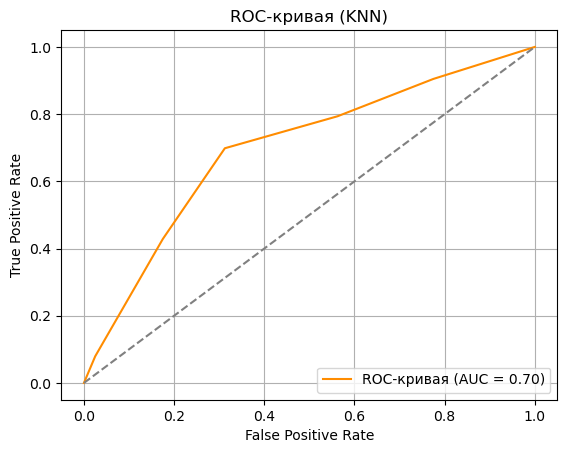

In [63]:
from sklearn.metrics import roc_curve, auc

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.plot(fpr_knn, tpr_knn, label=f'ROC-кривая (AUC = {roc_auc_knn:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая (KNN)")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


сделать вывод о наилучшей из 3 рассмотренных моделей
вывод: логистическая регрессия